In [5]:
# Imports
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

So far, you've learned about SVM with linear boundaries, and you applied these concepts in the earlier in this module. The boundary was a line with a given slope and intercept—a pretty simple thing to visualize. However, a straight line doesn't always nicely classify the data.

Next, you'll learn how to create nonlinear decision boundaries by transforming the data into a higher dimension, finding a good hyperplane boundary in the higher dimension, and transforming the result back to the starting data. You'll also quickly explore the kernel trick, which is what SVM actually uses to find the boundary hyperplane. The kernel trick is a more efficient method, because finding the boundary hyperplane using the brute-force solution would be computationally prohibitive.

**Note:** Here, you'll work with interactive 3D plots. Take a moment now to restart the kernel and run all cells.

## Thinking outside the plane

Imagine that you have some data that looks like this:

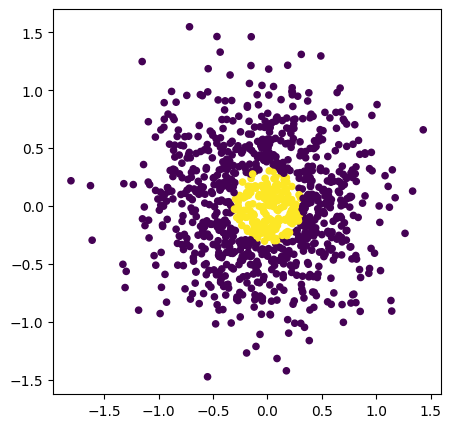

In [8]:
data = pd.DataFrame()
data['x'] = np.random.normal(0, .5, 1000)
data['y'] = np.random.normal(0, .5, 1000)

# Create your circle of indicators
data['d'] = data.x**2 + (data.y)**2 < .1

plt.figure(figsize=(5,5))
plt.scatter(data['x'], data['y'], c=data['d'], s= 20)

Clearly, no straight-line boundary is going to do a good job here. What you really want is a circular boundary. Is there any way to do that with a hyperplane? Yes—you just need a little perspective. Now, transform the data from two dimensions into three dimensions by adding a new feature. Specifically, add the new feature $x^2 + y^2$.

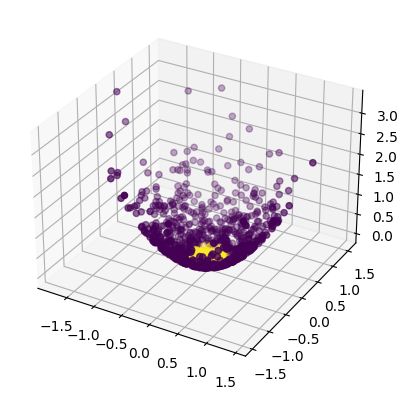

In [10]:
# We're doing 3D plotting now.

from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)

You can move these 3D plots around to get a good perspective on what's going on.

A hyperplane of this new 3D space is just a regular old 2D plane. Slip one in right between the classes.

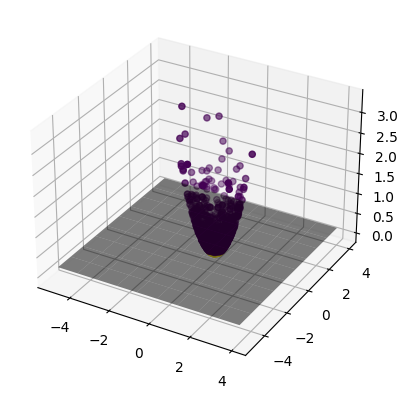

In [11]:
from mpl_toolkits.mplot3d import Axes3D

# Make our new variable
data['x2_y2'] = data.x**2 + data.y**2

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
xx, yy = np.meshgrid(range(-5, 5, 1), range(-5, 5, 1))
zz = np.empty((10,10))
zz.fill(0.2)
ax.plot_surface(xx, yy, zz, color='k', alpha=.5)
ax.scatter(xs=data.x, ys=data.y, zs=data.x2_y2, zdir='z', c=data.d)


Transforming back to two dimensions, you end up with exactly the nonlinear boundary that you need.

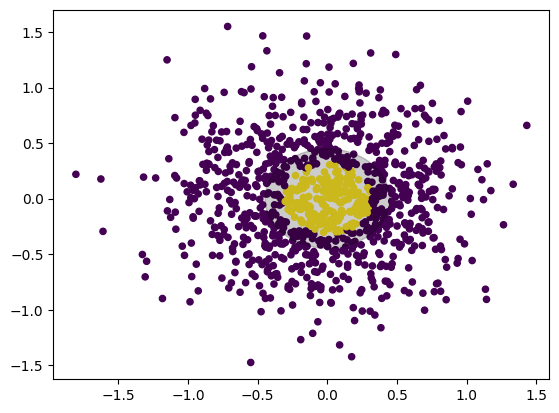

In [12]:
circle1 = plt.Circle((0, 0), np.sqrt(.2), color='k', alpha=.2)

fig, ax = plt.subplots()

ax.scatter(data['x'], data['y'], c=data['d'], s= 20)
ax.add_artist(circle1)

This can take a bit to wrap your mind around. Here's an excellent 3D animated example:

[SVM higher dimension visualization](http://www.youtube.com/watch?v=3liCbRZPrZA "SVM with polynomial kernel visualization")

Problem solved! You were able to generate a nice boundary by transforming into higher-dimensional space, finding the optimal hyperplane, and then transforming back.

## Kernels and the kernel trick

Here's the bad news: in practice, you won't have the computational resources to do this. Knowing how many dimensions you'll need isn't a simple calculation. And for real data, you'll probably want to run SVM with a very large number of features, leading to a very high-dimensional space. Trying to actually transform your data like this would require more computational and memory resources than you are likely to have at your disposal. In other words, this transformation is impractical when working with real data.

The good news is that you can find the optimal hyperplane of a higher-dimensional space without actually transforming the data into that space. The process that SVM uses for this is called the kernel trick. The kernel trick turns the search for a higher-dimensional hyperplane boundary from a practical impossibility into a computationally reasonable task. The vector math involved in the kernel trick is too much to explore here fully. You'll dive into it just enough to tune these models. If you wish to go deeper, you can check out the external resources below. Don't feel compelled to read all of them to complete comprehension.


### What _is_ a kernel?

You've heard the term *kernel* used previously to refer to the central hub of your computer, linking hardware and OS. You might be used to stopping and rerunning your Python kernel in Jupyter Notebooks. But *kernel* in this context means something totally different.

Here, think of *kernel functions* (or just *kernels*) as a way of mapping data to a space using weights. You can see kernels all over data science once you start looking for them.

The most common example is probably [kernel smoothing](https://en.wikipedia.org/wiki/Kernel_smoother). With kernel smoothing, you take a series of observations, and instead of plotting each one individually, you generate a smoothed curve. This smoothing is a byproduct of each observation becoming a weighted distribution in and of itself and then aggregating those cumulative distributions, resulting in something that's smooth rather than jumpy.

Kernels are a huge topic, and as a term, it's used to refer to many different but related concepts. Wikipedia's [disambiguation page for kernels](https://en.wikipedia.org/wiki/Kernel) has links to 22 different pages on kernels that are in some way related to mathematics or computing. It's definitely a lot, and a field worthy of its own program (or more honestly, several).


### Kernels in SVM

In the context of SVM, a kernel is a function that computes how "similar" two vectors are by computing their dot product. Even more specifically, in SVM, a *kernel* is a function that implicitly computes the dot product between two vectors in a higher-dimensional space—without actually transforming the vectors into that space.

This property is handy because the dot product is all that you need to find the optimal hyperplane in a higher-dimensional space. For now, just trust that this is true. The complexity of these kernel functions depends on only the number of dimensions of the input, not on the number of dimensions in the higher-dimensional feature space. This means that you can work with an infinite-dimensional feature space just as easily as with the space of your input data. This is called the *kernel trick*, and it lets you work with feature spaces that would otherwise be practically impossible to manage.

## Additional resources

You don't need to know more than this right now. If, however, you want a full explanation of the math behind the kernel trick, read this [post by Eric Kim](http://www.eric-kim.net/eric-kim-net/posts/1/kernel_trick.html), then this [paper by Martin Hoffman](http://www.cogsys.wiai.uni-bamberg.de/teaching/ss06/hs_svm/slides/SVM_Seminarbericht_Hofmann.pdf). This [hour-long lecture from Patrick Winston](https://www.youtube.com/watch?v=_PwhiWxHK8o) is a good, succinct derivation of everything that you've covered in SVM so far. All these links are optional, but they're a good place to start if you want to explore this topic further.

## Kernel estimation in practice

There are multiple kernels that you can use in SVM. Scikit-learn's default, which is called the *radial basis function*, uses a Gaussian decay according to the distance from the original point. This is the most common choice, and for the purposes of this program, you should stick to it unless you have a strong reason not to.

You can also use linear kernels, polynomial kernels, or sigmoid kernels—all of which are preprogrammed into scikit-learn's `SVC()` function.

When do you have a strong reason to choose another kernel? You may know enough about your data and [the geometry that it follows](https://stats.stackexchange.com/a/18032) that you can choose a more appropriate kernel. The other, more common, method for deciding which kernel to use is to rely upon cross-validation. As long as you are within the training set, using cross-validation is a reasonable way to choose a kernel methodology. But if you're tuning other hyperparameters as well, this could become quite a long process. Be aware that some kernels will lead to overfitting in specific situations, so you want to be wary.
